Shape of observations: (4000, 100, 37)
Number of runs: 100
Number of dones: 0
Number of runs with dones: 100
[  79  378   43   15  188 2047  133  143  821   92  200  428   69 2047
 2047   61 2047   90 2047  668  110  291 2047   76   58  146  308   83
 2047  416 2047  555  255   48 2047 2047 2047 2047 2047   21  276  179
 2047  307  354  113  423   58 2047  244   24 2047 1016 2047   47   31
   93 2047 2047 2047  232   69  189 2047   41 2047 2047  229  447  214
  101   74 2047 2047 1862 2047   78  196   65  413 2047   81  303 2047
 2047  286  352 2047 2047   72  116 2047  200 2047  395 2047  496 2047
  263 2047]
Full runs (first done > 2000): [ 5 13 14 16 18 22 28 30 34 35 36 37 38 42 48 51 53 57 58 59 63 65 66 72
 73 75 80 83 84 87 88 91 93 95 97 99]
Number of full runs: 36
Percentage of full runs: 36.00%
linvel: [[-0.1253156  -0.0459677  -0.12172376]
 [ 0.13916923 -0.03226387  0.2142276 ]
 [ 0.16101263  0.01193412 -0.02719945]
 [-0.09821909 -0.13498989 -0.11978043]]
angvel: [[ 0.478575

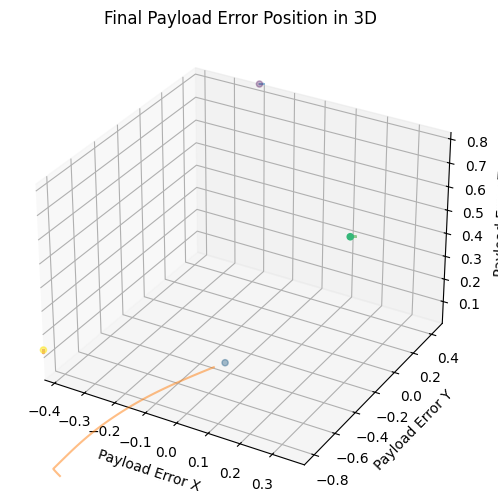

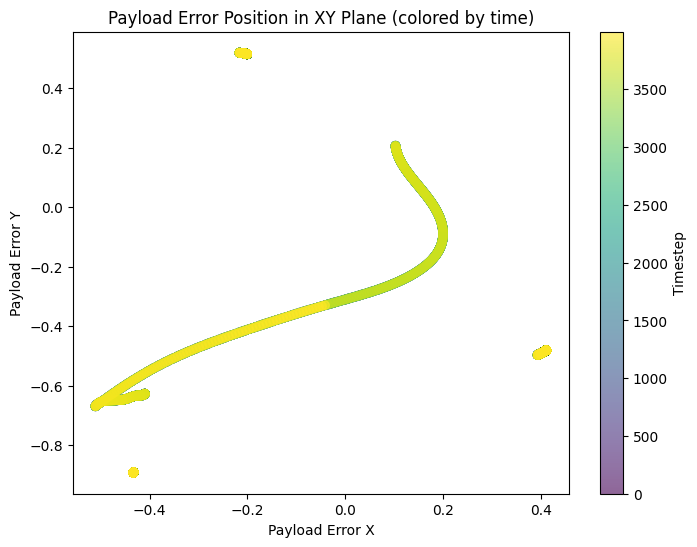

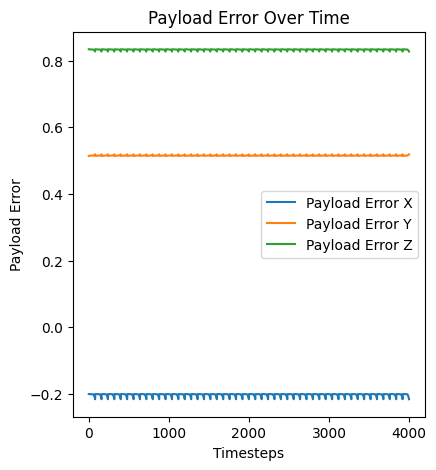

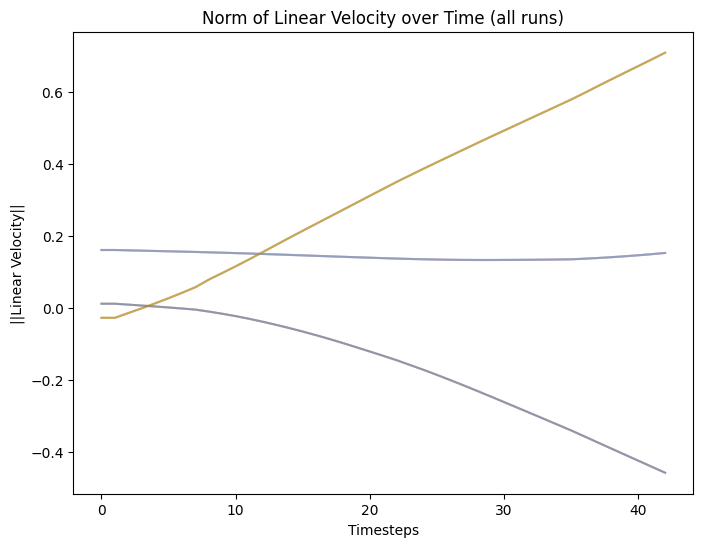

In [25]:
import asdf
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from mpl_toolkits.mplot3d import Axes3D

# Path to your ASDF file
file_path = 'flights.crazy.asdf'

# Load the ASDF file and read the observations into memory
with asdf.open(file_path) as af:
    obs = np.array(af['flights'][0]['agents']['agent_1']['observations'])
    dones = np.array(af['flights'][0]['global']['dones'])


print("Shape of observations:", obs.shape)



num_runs = 4
#count dones
num_dones = np.sum(dones[0, :])
print(f"Number of runs: {obs.shape[1]}")
print(f"Number of dones: {num_dones}")

# count runs with dones
runs_with_dones = np.sum(np.any(dones, axis=0))
print(f"Number of runs with dones: {runs_with_dones}")


# find index of first done
first_dones = np.argmax(dones,axis=0)
print(first_dones)
full_runs = np.where(first_dones > 2000)[0]
print(f"Full runs (first done > 2000): {full_runs}")

print(f"Number of full runs: {full_runs.shape[0]}")
# print percentage of runs that are full
percentage_full_runs = full_runs.shape[0] / obs.shape[1] *100
print(f"Percentage of full runs: {percentage_full_runs:.2f}%")




#Dynamic ix4 mapping: {'agent_0': [(0, 2), (3, 5), (30, 32), (6, 29), (54, 57)], 'agent_1': [(0, 2), (3, 5), (6, 8), (30, 53), (58, 61)]}
# Extract payload error (X, Y, Z) for the first num_runs environments
timesteps = obs.shape[0]
time = np.arange(timesteps)
payload = obs[:, :num_runs, 0:3]  # shape (timesteps, num_runs, 3)
payload_velocity = obs[:, :num_runs, 3:6]  # shape (timesteps, num_runs, 3)
other_quads = obs[:, :num_runs, 6:9]  # shape (timesteps, num_runs, 3)

#obs_list = [payload_error, payload_linvel, rel, rot, linvel, angvel, linear_acc, angular_acc]
q_pos = obs[:, :num_runs, 9:12]  # shape (timesteps, num_runs, 3)
q_rot_mat = obs[:, :num_runs, 12:21]  # shape (timesteps, num_runs, 9)
q_linvel = obs[:, :num_runs, 21:24]  # shape (timesteps, num_runs, 3)
q_angvel = obs[:, :num_runs, 24:27]  # shape (
q_linacc = obs[:, :num_runs, 27:30]  # shape (timesteps, num_runs, 3)
q_angacc = obs[:, :num_runs, 30:33]  # shape (timesteps, num_runs, 3)
q_last_action = obs[:, :num_runs, 33:36]  # shape (timesteps, num_runs, 3)










print("linvel:", q_linvel[0,:4,:])
print("angvel:", q_angvel[0,:4,:])

# Create 3D plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

print(f"Payload shape (timesteps, runs, dims): {payload.shape}")

# Plot final positions in 3D
final_pos = payload[-1]
xs, ys, zs = final_pos[:, 0], final_pos[:, 1], final_pos[:, 2]
ax.scatter(xs, ys, zs, c=range(num_runs), cmap='viridis', depthshade=True)

# render path
for run in range(num_runs):

    path = payload[2000:2100, run, :]  # Extract the path for each run
    ax.plot(path[:, 0], path[:, 1], path[:, 2], alpha=0.5)  # Plot the path
# Set limits for better visualization
ax.set_xlim([np.min(xs), np.max(xs)])
ax.set_ylim([np.min(ys), np.max(ys)])
ax.set_zlim([np.min(zs), np.max(zs)])

# Labels and title
ax.set_xlabel('Payload Error X')
ax.set_ylabel('Payload Error Y')
ax.set_zlabel('Payload Error Z')
ax.set_title('Final Payload Error Position in 3D')

# plot only in xy plane with color based on time
fig2, ax2 = plt.subplots(figsize=(8, 6))
start, end = 0, 4000
times = np.arange(start, end)
for run in range(num_runs):
    path = payload[start:end, run, :]
    sc = ax2.scatter(path[:, 0], path[:, 1], c=times, cmap='viridis', alpha=0.6)
ax2.set_xlabel('Payload Error X')
ax2.set_ylabel('Payload Error Y')
ax2.set_title('Payload Error Position in XY Plane (colored by time)')
cbar = fig2.colorbar(sc, ax=ax2)
cbar.set_label('Timestep')
# Show the plots
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(time, payload[:, 0, 0], label='Payload Error X')
plt.plot(time, payload[:, 0, 1], label='Payload Error Y')
plt.plot(time, payload[:, 0, 2], label='Payload Error Z')
plt.xlabel('Timesteps')
plt.ylabel('Payload Error')
plt.title('Payload Error Over Time')
plt.legend()

# Compute the norm of linear velocity at each timestep for each run
linvel_norm = np.linalg.norm(q_linvel, axis=2)  # shape (timesteps, num_runs)

# Plot all runs
fig3, ax3 = plt.subplots(figsize=(8, 6))
for r in range(num_runs):
    end = first_dones[2]
    linvel_norm = np.linalg.norm(q_linvel[:end,2,:], axis=1)
    ax3.plot(time[:end], q_linvel[:end,2,:], alpha=0.3)
ax3.set_xlabel('Timesteps')
ax3.set_ylabel('||Linear Velocity||')
ax3.set_title('Norm of Linear Velocity over Time (all runs)')
plt.show()

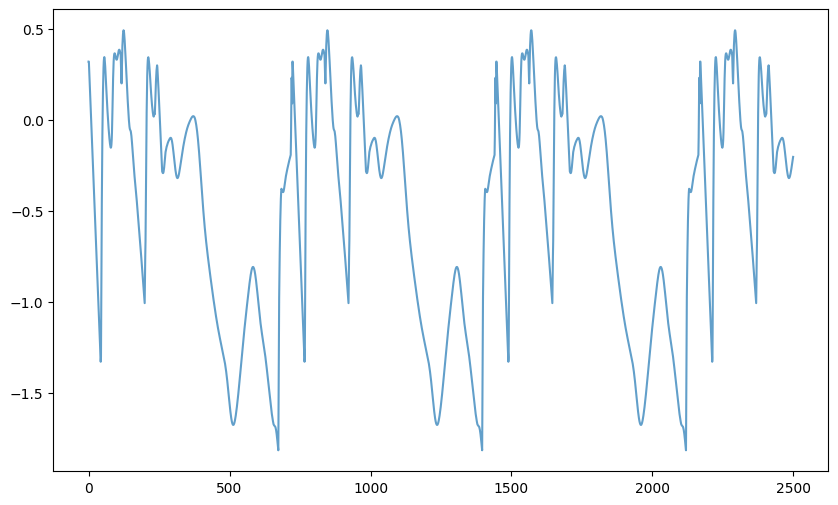

NameError: name 'abs_quad_pos' is not defined

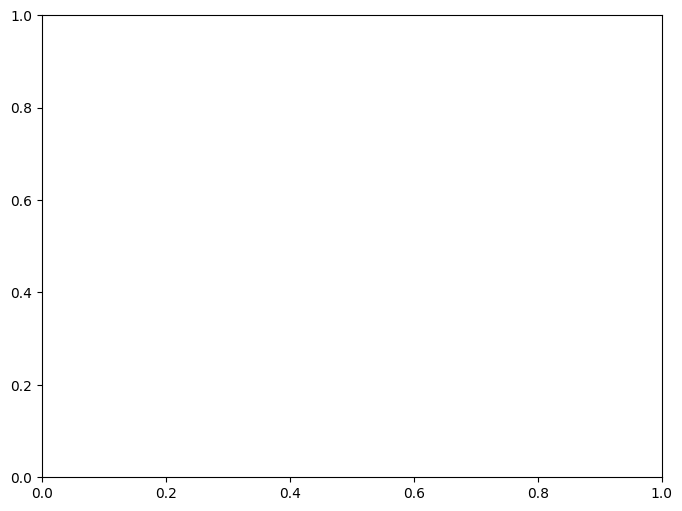